In [1]:
import sys
sys.path.insert(1, '/home/afkirby/Analysis')

In [2]:
from read_penguin import load_3D_data, cell_center
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import Geometry as geo
from Numerics import *

In [3]:
def density(x, y, z, data):
    xVals = cell_center(data[1])
    yVals = cell_center(data[2])
    zVals = cell_center(data[3])
    dens = data[4]
    r = [x, y, z]
    den = interpolate3DSpherical(xVals, yVals, zVals, dens, r)
    return den

In [4]:
def finddens3D(x, y, z, data, planetPosition):
    
    #transforming input planet coordinates to cartesian
    sphepolar = (x,y,z)
    cartesian = geo.sphericalToCartesian(sphepolar, dim=3)
    #print(cartesian)
    
    #transforming to star-centric spherical and interpolating
    StarCentricCart = np.array(cartesian) - np.array(geo.sphericalToCartesian(planetPosition, dim = 3))
    #print(StarCentricCart)
    starCentric = geo.cartesianToSpherical(StarCentricCart, dim = 3)
    #print(starCentric)
    den = density(starCentric[0], starCentric[1], starCentric[2], data)
    return den


In [5]:
#Loading density data

xres3d = 288
yres3d = 480
zres3d = 144
data = load_3D_data("/scratch/afkirby/3DRsVariation/rs001/", xres3d, yres3d, zres3d, "h50_1p10E_e0_PPM4_ave", 0)

In [6]:
#creating a 2D grid around midplane
planetCoord = (1, np.pi, np.pi*0.5)
planetCoordCart = geo.sphericalToCartesian(planetCoord, dim = 3)


def populateX(i, data):
    return 0 + 0.1*i/500

def populateY(i, data):
    return 2*np.pi*i/500


planetX = np.ndarray(500)
planetY = np.ndarray(500)


for i in range(500):
    planetX[i] = populateX(i, data)
    planetY[i] = populateY(i, data)
    

DensNew = np.ndarray((500,500))

for i in range(500):
    for j in range(500):
        d = finddens3D(planetX[i], planetY[j], np.pi*0.5, data, planetCoord)
        DensNew[i,j] = d
print(DensNew)
#polar = np.pi*0.5 - 0.005
#d = finddens3D(0.00001, 1, polar, data, planetCoord)


[[0.99998626 0.99998626 0.99998626 ... 0.99998626 0.99998626 0.99998626]
 [0.99948645 0.99948649 0.9994866  ... 0.9994868  0.9994866  0.99948649]
 [0.99898698 0.99898706 0.99898729 ... 0.99898769 0.99898729 0.99898706]
 ...
 [0.78907422 0.78908711 0.78912579 ... 0.78919024 0.78912579 0.78908711]
 [0.78871302 0.78872594 0.78876469 ... 0.78882926 0.78876469 0.78872594]
 [0.78835183 0.78836477 0.78840359 ... 0.78846827 0.78840359 0.78836477]]


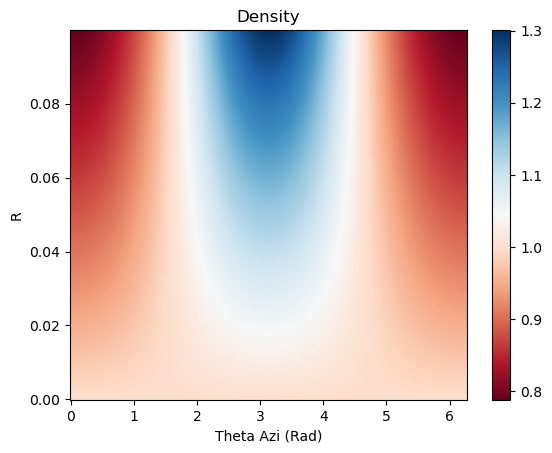

In [7]:
plt.figure()
plt.pcolor(planetY, planetX, DensNew, cmap = "RdBu")
plt.title("Density")
plt.ylabel("R")
plt.xlabel("Theta Azi (Rad)")
plt.colorbar()
#plt.savefig("gamma1.4radiusvazi.png", dpi=300)
plt.show()

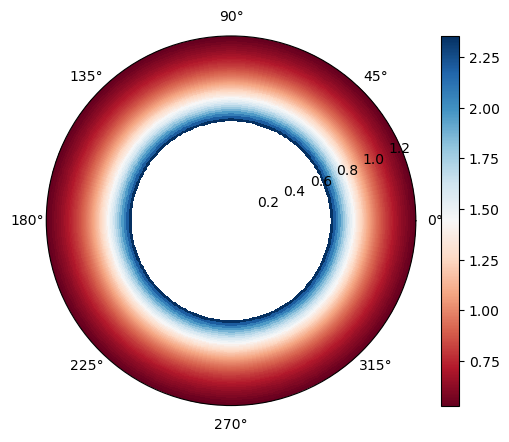

In [8]:
fig, ax = plt.subplots(subplot_kw = {'projection': 'polar'})
ax.grid(False)
plt.pcolormesh(data[2], data[1], np.transpose(data[4][-1]), cmap = "RdBu")
plt.colorbar()
#plt.savefig("raw_gamma1.4.png", dpi=300)
plt.show()

In [9]:
#plotting vertical circles 

planetCoord = (1, np.pi, np.pi*0.5)
planetCoordCart = geo.sphericalToCartesian(planetCoord, dim = 3)
imax = 100
kmax = 100

def populateX(i, imax, data):
    return 0.0 + 0.1*i/imax

def populateZ(i, kmax, data):
    return np.pi*i/kmax


planetX = np.ndarray(imax)
planetZ = np.ndarray(kmax)


for i in range(imax):
    planetX[i] = populateX(i, imax, data)
    planetZ[i] = populateZ(i, kmax, data)
    

DensNew1 = np.ndarray((imax,kmax))

for i in range(imax):
    for k in range(kmax):
        d = finddens3D(planetX[i], np.pi, planetZ[k] , data, planetCoord)
        DensNew1[i,k] = d
        #print(d)
print(DensNew1)

(143, inf)
(142, 143)
(142, 143)
(141, 142)
(141, 142)
(140, 141)
(140, 141)
(140, 141)
(139, 140)
(139, 140)
(139, 140)
(138, 139)
(138, 139)
(138, 139)
(138, 139)
(137, 138)
(137, 138)
(137, 138)
(137, 138)
(136, 137)
(136, 137)
(136, 137)
(136, 137)
(136, 137)
(135, 136)
(135, 136)
(135, 136)
(135, 136)
(135, 136)
(135, 136)
(134, 135)
(134, 135)
(134, 135)
(134, 135)
(134, 135)
(134, 135)
(134, 135)
(134, 135)
(134, 135)
(134, 135)
(134, 135)
(133, 134)
(133, 134)
(133, 134)
(133, 134)
(133, 134)
(133, 134)
(133, 134)
(133, 134)
(142, 143)
(141, 142)
(140, 141)
(140, 141)
(139, 140)
(138, 139)
(138, 139)
(137, 138)
(137, 138)
(136, 137)
(136, 137)
(135, 136)
(135, 136)
(134, 135)
(134, 135)
(134, 135)
(133, 134)
(133, 134)
(132, 133)
(132, 133)
(132, 133)
(132, 133)
(131, 132)
(131, 132)
(131, 132)
(131, 132)
(130, 131)
(130, 131)
(130, 131)
(130, 131)
(130, 131)
(129, 130)
(129, 130)
(129, 130)
(129, 130)
(129, 130)
(129, 130)
(129, 130)
(128, 129)
(128, 129)
(128, 129)
(128, 129)

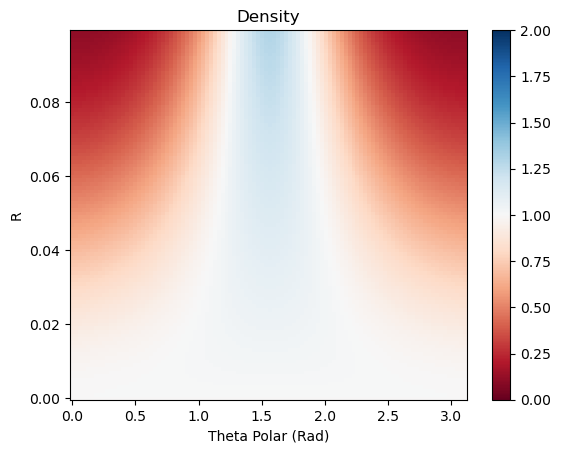

In [10]:
plt.figure()
plt.pcolor(planetZ, planetX, DensNew1, cmap = "RdBu")
plt.title("Density")
plt.ylabel("R")
plt.xlabel("Theta Polar (Rad)")
plt.clim(0,2)
plt.colorbar()
#plt.savefig("gamma1.4radiusvpolar.png", dpi=300)

In [11]:
for i in range(imax):
    for k in range(kmax):
        if(DensNew1[i,k] == 0):
            print(planetX[i], planetZ[k])

In [12]:
def interpolate3DSpherical(xVals, yVals, zVals, data, r):
    x1 = r[0] #X Position
    x2 = r[1] #Y Position
    if(x2 < 0):
        x2 = x2%(2*np.pi) + 2*np.pi
    x3 = r[2] #Z Position
    if(x3 > np.pi or x3 < 0):
    	return 0
    
    xPoints = binSearch(xVals, 0, len(xVals), x1)
    yPoints = binSearch(yVals, 0, len(yVals), x2)
    zPoints = binSearch(zVals, 0, len(zVals), x3)
    if(xPoints[0] == -np.infty):
        return 0
    elif(xPoints[1] == np.infty):
        return 0
    if(yPoints[0] == -np.infty):
        yPoints = (len(yVals)-1, 0)
    elif(yPoints[1] == np.infty):
        yPoints = (0, len(yVals)-1)
    if(zPoints[1] == np.infty):
        if x3 > np.pi/2:
            x3 = np.pi - x3
            zPoints = binSearch(zVals, 0, len(zVals), x3)
            print(zPoints)
            if(zPoints[0] == -np.infty):
                return 0
            if(zPoints[1] == np.infty):
                zPoints = (-1,-1)
        else:
            zPoints = (-1, -1)
    if(zPoints[0] == -np.infty):
        return 0
    lowx = xPoints[0]
    highx = xPoints[1]
    lowy = yPoints[0]
    highy = yPoints[1]
    lowz = zPoints[0]
    highz = zPoints[1]
    targetCoords = (x1,x2,x3)
    minCoords = (xVals[lowx], yVals[lowy], zVals[lowz])
    maxCoords = (xVals[highx], yVals[highy], zVals[highz])
    cubeVals = [data[lowz,lowy,lowx], data[highz,lowy,lowx], data[lowz,highy,lowx], data[highz,highy,lowx], data[lowz,lowy,highx], data[highz, lowy, highx], data[lowz, highy, highx], data[highz, highy, highx]]
    return triInterpolate(targetCoords, cubeVals, minCoords, maxCoords)

def density(x, y, z, data):
    xVals = cell_center(data[1])
    yVals = cell_center(data[2])
    zVals = cell_center(data[3])
    dens = data[4]
    r = [x, y, z]
    den = interpolate3DSpherical(xVals, yVals, zVals, dens, r)
    return den

def finddens3D(x, y, z, data, planetPosition):
    
    #transforming input planet coordinates to cartesian
    sphepolar = (x,y,z)
    cartesian = geo.sphericalToCartesian(sphepolar, dim=3)
    
    #transforming to star-centric spherical and interpolating
    StarCentricCart = np.array(cartesian) - np.array(geo.sphericalToCartesian(planetPosition, dim = 3))
    starCentric = geo.cartesianToSpherical(StarCentricCart, dim = 3)
    den = density(starCentric[0], starCentric[1], starCentric[2], data)
    return den

In [13]:
coords = (0.001, np.pi, 1.6022122533307945)
print(finddens3D(coords[0], coords[1], coords[2], data, planetCoord))

(143, inf)
1.0024893696270685


In [14]:
print(6.283185307179586/np.pi)

2.0
